In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn
import collections
import math
import statistics

#Set parameters
%matplotlib inline
pd.options.display.max_rows = 30

In [2]:
# Load data from csv file
file_path = os.path.join(os.pardir, 'data', 'raw', 'survey_results_public.csv')
df = pd.read_csv(file_path)

## 1. Work challenges

In [3]:
# Count of Null values in LanguageWorkedWith and LanguageDesireNextYear columns
print(f'Number of null values in Main Branch column: {np.sum(df.MainBranch.isnull() == True)}')
print(f'Number of null values in WorkPlan column: {np.sum(df.WorkChallenge.isnull() == True)}')

Number of null values in Main Branch column: 552
Number of null values in WorkPlan column: 20742


In [4]:
# Count each blocker occurance in dataset
blockers = {}
for row in df.WorkChallenge:
    for blocker in str(row).split(';'):
        blockers.setdefault(blocker, int())
        blockers[blocker] += 1
blockers.update((x, (y/df.shape[0])*100) for x, y in blockers.items())

In [5]:
blocker_percent = pd.DataFrame(index=blockers.keys(), columns=['Blocker'], dtype='float')
for blocker, percent in blockers.items():
    blocker_percent.at[blocker, 'Blocker'] = percent

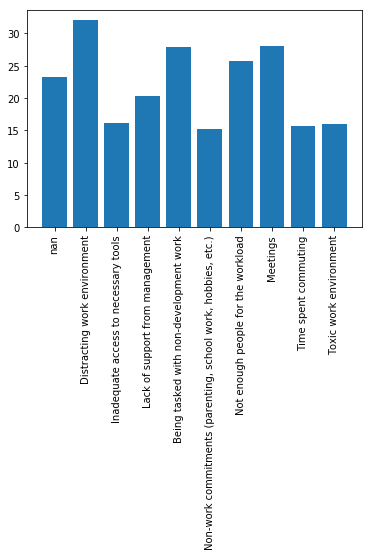

In [6]:
fig = plt.bar(range(len(blockers)), list(blockers.values()))
plt.xticks(range(len(blockers)), list(blockers.keys()), rotation='vertical');

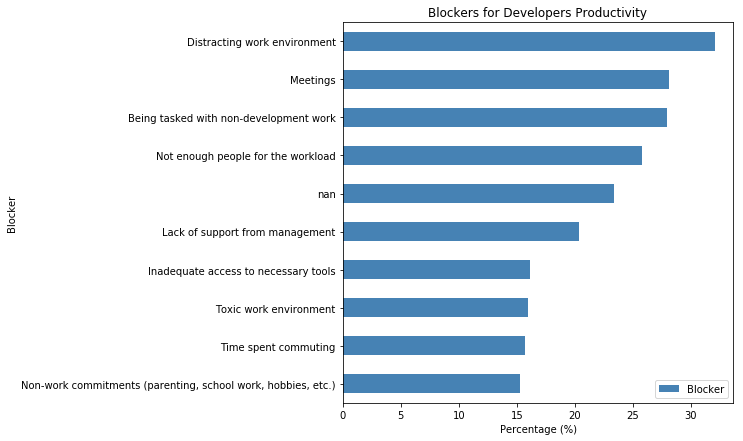

In [7]:
# Plot for Outside USA respondents
fig = blocker_percent.nlargest(10, 'Blocker').plot(kind='barh', figsize=(7,7), color='steelblue');
fig.invert_yaxis()
plt.title('Blockers for Developers Productivity');
plt.ylabel('Blocker');
plt.xlabel('Percentage (%)');